# Pyvista教程

## Installation
```shell
mamba create -n pyvista 
mamba activate pyvista

安装 matplotlib numpy os
pip install matplotlib numpy os

安装pyvista和notebook
pip install pyvista jupyter notebook

安装谷歌云，可以从云盘下载我们的测试数据
pip install gdown 
```



## 从谷歌云中下载我们的数据
运行你们自己的数据的时候，该节可不运行。

In [1]:
import gdown  

def download_google_drive_file(file_id, file_name):  
    """  
    从Google Drive下载指定的文件。  

    参数:  
    file_id (str): Google Drive文件的ID。  
    file_name (str): 下载后保存的文件名。  

    返回:  
    bool: 下载成功返回True,否则返回False。  
    """  
    try:  
        # 构造下载URL  
        url = f"https://drive.google.com/uc?id={file_id}"  

        # 下载文件  
        gdown.download(url, file_name, quiet=False)  

        print(f"File '{file_name}' has been downloaded successfully.")  
        return True  
    except Exception as e:  
        print(f"An error occurred while downloading the file: {e}")  
        return False  

# 使用示例  下载Sample4.dat
if __name__ == "__main__":  
    file_id = "1DldvrTER7Pe6MsP9j4JlFQQ5i0iRytMU"  # 请替换为实际的文件ID  
    # https://drive.google.com/file/d/1DldvrTER7Pe6MsP9j4JlFQQ5i0iRytMU/view?usp=drive_link
    file_name = "Sample4.dat"  
    
    success = download_google_drive_file(file_id, file_name)  
    if success:  
        print("Download completed successfully.")  
    else:  
        print("Download failed.")

# 使用示例  下载thermalIc.cpt
if __name__ == "__main__":  
    file_id = "16_Lpj2UBCymubQI719JUBaKwJBCQKpiF"  # 请替换为实际的文件ID  
   # https://drive.google.com/file/d/16_Lpj2UBCymubQI719JUBaKwJBCQKpiF/view?usp=drive_link
    file_name = 'thermalIc.cpt'
    success = download_google_drive_file(file_id, file_name)  
    if success:  
        print("Download completed successfully.")  
    else:  
        print("Download failed.")

Downloading...
From: https://drive.google.com/uc?id=1DldvrTER7Pe6MsP9j4JlFQQ5i0iRytMU
To: d:\python_code\Sample4.dat
100%|██████████| 10.3M/10.3M [00:04<00:00, 2.10MB/s]


File 'Sample4.dat' has been downloaded successfully.
Download completed successfully.


Downloading...
From: https://drive.google.com/uc?id=16_Lpj2UBCymubQI719JUBaKwJBCQKpiF
To: d:\python_code\thermalIc.cpt
100%|██████████| 246/246 [00:00<?, ?B/s] 

File 'thermalIc.cpt' has been downloaded successfully.
Download completed successfully.


## 导入特定的库、读取GMT色标
我们的绘图一般是使用GMT绘制，但是GMT绘制三维图存在一定的局限性，本教程里面的大部分图均可以用GMT实现，但是Pyvista更便捷，可玩性很高。

首先我们需导入特定的库，再读取GMT的色标文件(*.cpt)，目的是和GMT绘出的图色标保持一致。

我们使用的数据为合成数据，数据质量不佳，各位可以替换为自己的数据进行绘图。


In [2]:
import numpy as np
import pyvista as pv
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import os

In [3]:
def parse_color(color_str):
    if '/' in color_str:
        return tuple(int(c) / 255 for c in color_str.split('/'))
    return {'red': (1, 0, 0), 'black': (0, 0, 0)}.get(color_str, (0, 0, 0))

def read_gmt_cpt(file_path):
    colors, values = [], []
    with open(file_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) >= 4 and not line.startswith(('#', 'B', 'F', 'N', 'COLOR_MODEL=')):
                values.extend([float(parts[0]), float(parts[2])])
                colors.extend([parse_color(parts[1]), parse_color(parts[3])])
    
    if not colors:
        raise ValueError("No color data found in the CPT file.")
    
    min_val, max_val = min(values), max(values)
    norm_values = [(v - min_val) / (max_val - min_val) for v in values]
    return LinearSegmentedColormap.from_list("gmt_cmap", list(zip(norm_values, colors))), (min_val, max_val)
try:
    cmap, (min_val, max_val) = read_gmt_cpt('thermalIc.cpt')
except Exception as e:
    print(f"Error reading CPT file: {e}")
    cmap, min_val, max_val = 'viridis', 0, 4

## 读取数据文件
三维图的数据格式为4列，x y z value。

In [4]:
# 读取.dat文件
data = np.loadtxt('Sample4.dat')

# 提取x, y, z和value列
x = data[:, 0]
y = data[:, 1]
z = data[:, 2]
values = data[:, 3]

以上这些命令都是通用的。
## 绘制三维插值体图

c:\Users\acer\mambaforge\envs\pyvista\lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


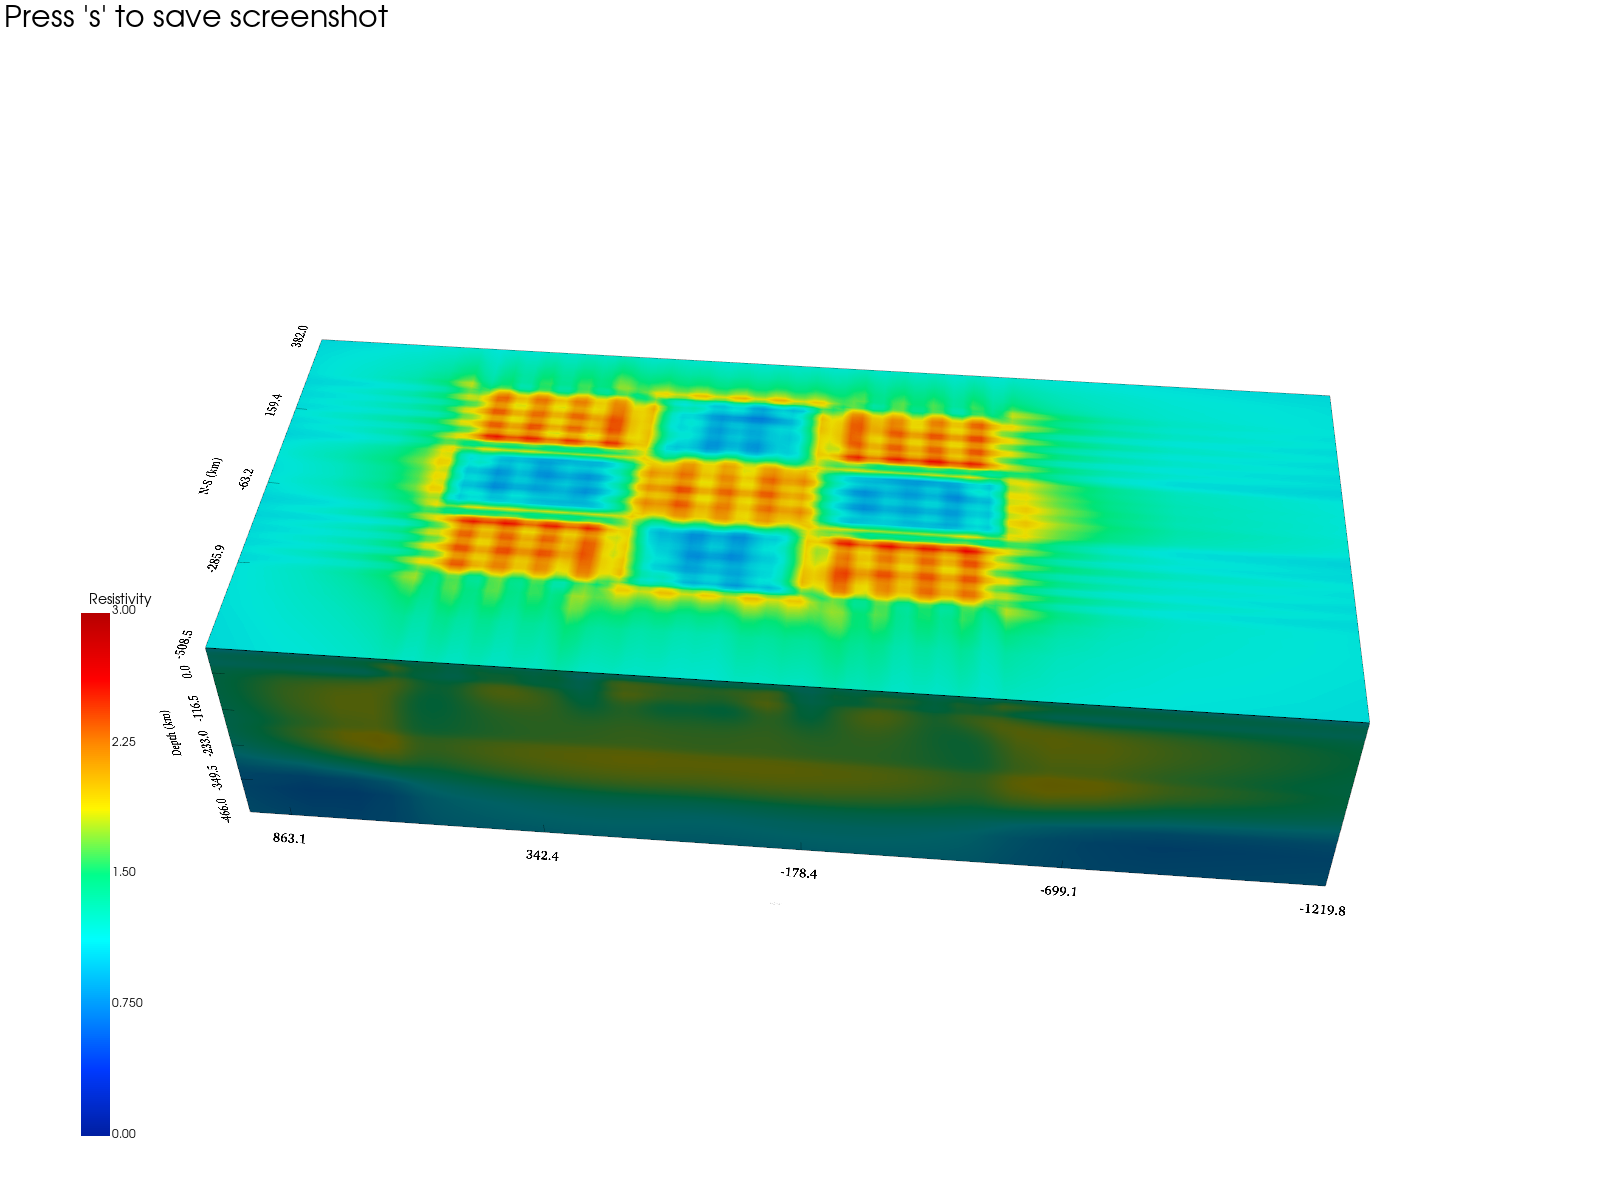

In [5]:
import pyvista as pv  
import numpy as np  
import os  

# 创建结构化网格  
grid = pv.StructuredGrid()  
grid.points = np.column_stack((x, y, z))  
grid.dimensions = [len(np.unique(x)), len(np.unique(y)), len(np.unique(z))]  

# 添加数据到网格  
grid.point_data["values"] = values  

# 创建 plotter 对象  
plotter = pv.Plotter()  
plotter.window_size = [1600, 1200]  

# 设置背景颜色为白色  
plotter.set_background('white')  

# 添加网格到 plotter，显示 PyVista 的色标  
plotter.add_mesh(grid, cmap=cmap, clim=[0, 3], show_scalar_bar=True,  
                 scalar_bar_args={'title': 'Resistivity', 'n_labels': 5,   
                                  'font_family': 'arial',  
                                  'label_font_size': 12,  
                                  'title_font_size': 14,  
                                  'width': 0.05, 'position_x': 0.05, 'position_y': 0.05,  
                                  'vertical': True})

# 设置三维视角  
plotter.camera_position = 'iso'  # 等距视角  
plotter.camera.azimuth = 140  # 方位角  
plotter.camera.elevation = 10  # 仰角  
plotter.camera.zoom(1)  # 稍微放大  



# 添加坐标轴和标签  
plotter.show_bounds(grid=False, location='outer', all_edges=True,  
                    xtitle='N-S (km)', ytitle='E-W (km)', ztitle='Depth (km)',  
                    font_size=10, font_family='times',  
                    axes_ranges=[grid.bounds[0], grid.bounds[1],  
                                 grid.bounds[2], grid.bounds[3],  
                                 0, 400])  

# 定义保存图像的函数  
def save_screenshot():  
    output_folder = 'output'  
    os.makedirs(output_folder, exist_ok=True)  
    image_path = os.path.join(output_folder, 'pyvista_screenshot.png')  
    plotter.screenshot(image_path)  
    print(f"Screenshot saved to: {image_path}")  

# 添加键盘事件  
plotter.add_key_event('s', save_screenshot)  

# 显示说明  
plotter.add_text("Press 's' to save screenshot", font_size=12)  

# 显示交互式窗口  
plotter.show()

## 绘制三维原始网格图

c:\Users\acer\mambaforge\envs\pyvista\lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


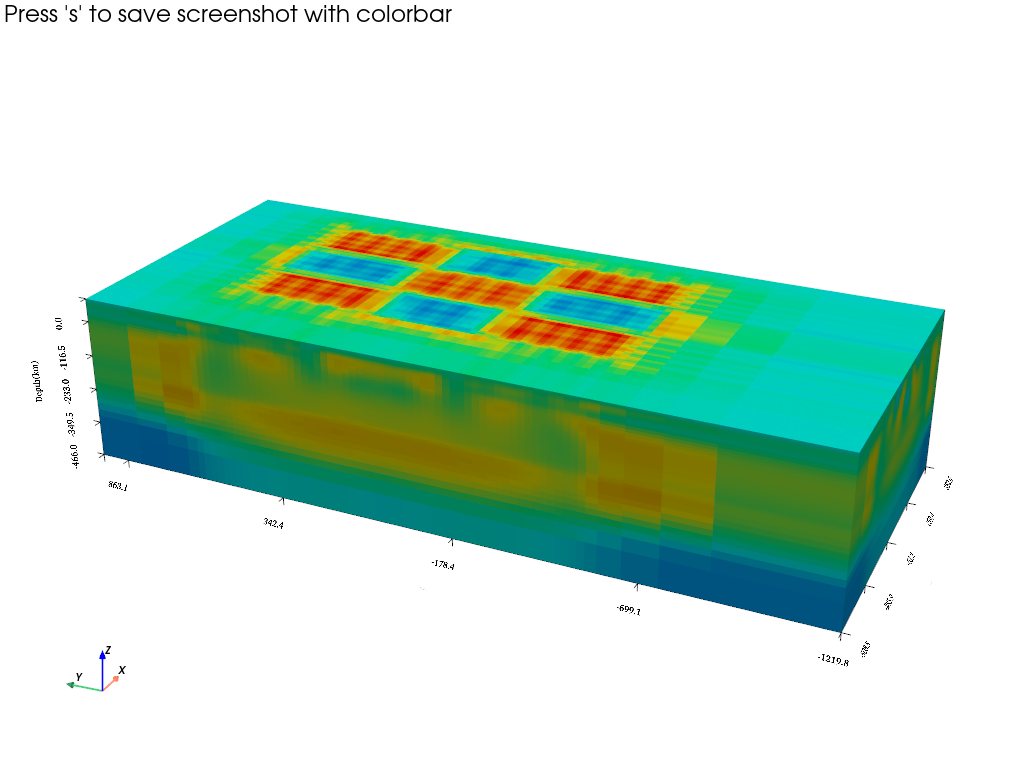

In [6]:
# 创建结构化网格
grid = pv.StructuredGrid()
grid.points = np.column_stack((x, y, z))
grid.dimensions = [len(np.unique(x)), len(np.unique(y)), len(np.unique(z))]

# 先将数据添加到网格的点数据中
grid.point_data["values"] = values

# 将点数据转换为单元数据
grid = grid.point_data_to_cell_data()

# 创建 plotter 对象
plotter = pv.Plotter()

# 设置背景颜色为白色
plotter.set_background('white')

# 添加网格到 plotter，使用单元数据，不显示色标
plotter.add_mesh(grid, scalars="values", cmap=cmap, clim=[0, 3], show_edges=False, show_scalar_bar=False)

# 添加坐标轴
plotter.show_axes()


# 自定义网格线和标注
plotter.show_grid(
    xtitle='N-S(km)', ytitle='E-W(km)', ztitle='Depth(km)',
    font_size=7,
    font_family='times',
    color='black',
    ticks='outside',
    show_xlabels=True, show_ylabels=True, show_zlabels=True,
)

# 设置三维视角  
plotter.camera_position = 'iso'  # 等距视角  
plotter.camera.azimuth = 160  # 方位角  
plotter.camera.elevation = -10  # 仰角 
plotter.camera.zoom(1.15)  # 稍微放大  
# plotter.camera.roll += 180  # 沿视线方向旋转相机

# 定义保存和显示图像的函数
def save_and_show_screenshot():
    # 获取 PyVista 渲染的图像
    image = plotter.screenshot(transparent_background=False, return_img=True)
    
    # 创建 Matplotlib 图形并添加色标
    fig, ax = plt.subplots(figsize=(16, 12))
    ax.imshow(image)
    ax.axis('off')

    # 添加色标
    cax = fig.add_axes([0.92, 0.3, 0.02, 0.4])
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=3))
    cbar = fig.colorbar(sm, cax=cax)
    cbar.set_label('Resistivity', fontsize=12, labelpad=10, fontfamily='Arial')
    cbar.ax.tick_params(labelsize=8)
    cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), fontfamily='Arial')

    # 保存图像
    output_folder = 'output'
    os.makedirs(output_folder, exist_ok=True)
    image_path = os.path.join(output_folder, 'pyvista_matplotlib_colorbar.png')
    plt.savefig(image_path, dpi=1000, bbox_inches='tight')
    plt.close(fig)
    
    print(f"Screenshot saved to: {image_path}")

# 添加键盘事件
plotter.add_key_event('s', save_and_show_screenshot)

# 显示说明
plotter.add_text("Press 's' to save screenshot with colorbar", font_size=12)

# 显示图像
plotter.show()

## 绘制等值面
绘制等值面是pyvista的重头戏，其他的图GMT都能画出（前提是要把数据自己提取好）。

而用pyvista能直接生成等值面。Voxler也能绘制出等值面图，但其是收费的。

之前的色标在图中没有展示出来，因为我使用的是matplotlib的色标，其比pyvista的色标好看下，在notebook中是不显示的，保存后会显示出来。

这个例子中我们使用了pyvista自带的色标，给大家展示下。

c:\Users\acer\mambaforge\envs\pyvista\lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


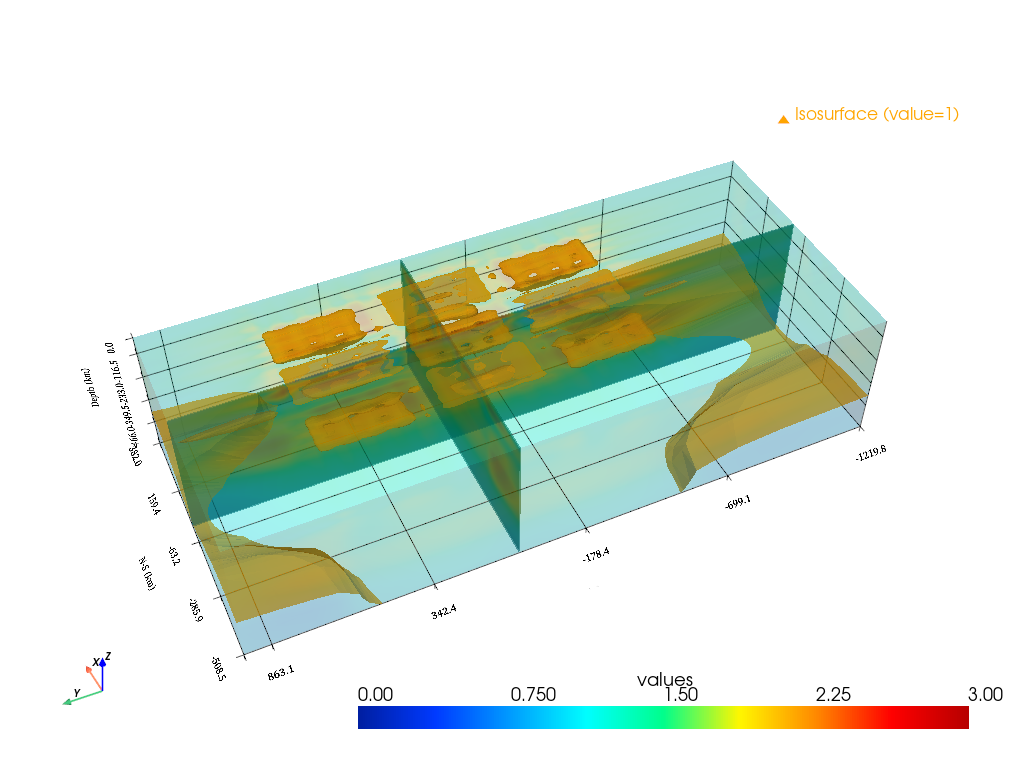

In [7]:
# 创建结构化网格
grid = pv.StructuredGrid()
grid.points = np.column_stack((x, y, z))
grid.dimensions = [len(np.unique(x)), len(np.unique(y)), len(np.unique(z))]

# 将数据添加到网格的点数据中
grid.point_data["values"] = values

pv.global_theme.allow_empty_mesh = True

# 创建 plotter 对象
plotter = pv.Plotter()

# 设置背景颜色为白色
plotter.set_background('white')

# 添加网格到 plotter，使用点数据
plotter.add_mesh(grid, scalars="values", cmap=cmap, clim=[0, 3], show_edges=False, opacity=0.2)

# 创建并添加等值面
contour = grid.contour(isosurfaces=[1], scalars="values")
plotter.add_mesh(contour, color='orange', opacity=0.8, line_width=2, label='Isosurface (value=1)')

# 添加水平切片（使用原始数据）
horizontal_slice_1 = grid.slice(normal='z', origin=(0, 0, 2))  # 在z=2处切片
plotter.add_mesh(horizontal_slice_1, scalars="values", cmap=cmap, clim=[0, 3], opacity=0.6)

horizontal_slice_2 = grid.slice(normal='z', origin=(0, 0, 5))  # 在z=5处切片
plotter.add_mesh(horizontal_slice_2, scalars="values", cmap=cmap, clim=[0, 3], opacity=0.6)

# 添加垂直切片（使用原始数据）
vertical_slice_1 = grid.slice(normal='y', origin=(0, 2, 0))  # 在y=2处切片
plotter.add_mesh(vertical_slice_1, scalars="values", cmap=cmap, clim=[0, 3], opacity=0.6)

vertical_slice_2 = grid.slice(normal='y', origin=(0, 6, 0))  # 在y=6处切片
plotter.add_mesh(vertical_slice_2, scalars="values", cmap=cmap, clim=[0, 3], opacity=0.6)

# 添加x向的切片（使用原始数据）
vertical_slice_3 = grid.slice(normal='x', origin=(2, 0, 0))  
plotter.add_mesh(vertical_slice_3, scalars="values", cmap=cmap, clim=[0, 3], opacity=0.6)

vertical_slice_4 = grid.slice(normal='x', origin=(6, 0, 0))  
plotter.add_mesh(vertical_slice_4, scalars="values", cmap=cmap, clim=[0, 3], opacity=0.6)

# 添加坐标轴
plotter.show_axes()

# 自定义网格线和标注
plotter.show_grid(
    xtitle='N-S (km)', ytitle='E-W (km)', ztitle='Depth (km)',
    font_size=8,
    font_family='times',
    color='black',
    ticks='outside',
    show_xlabels=True, show_ylabels=True, show_zlabels=True
)

# 添加图例
plotter.add_legend()

# 设置三维视角
plotter.camera_position = 'iso'  # 等距视角
plotter.camera.azimuth = 110  # 方位角
plotter.camera.elevation = 10  # 仰角
plotter.camera.zoom(1)  # 稍微放大

# 显示图像
plotter.show()

## 绘制水平切片和垂直切片（插值后）
pyvista只需导入数据，输入命令会自动生成切片图。

而gmt也能画，但还需要自己提取数据。所以pyvista在绘制三维图方面更便捷。

在做一些横向项目的绘图中，可以大胆使用。

c:\Users\acer\mambaforge\envs\pyvista\lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


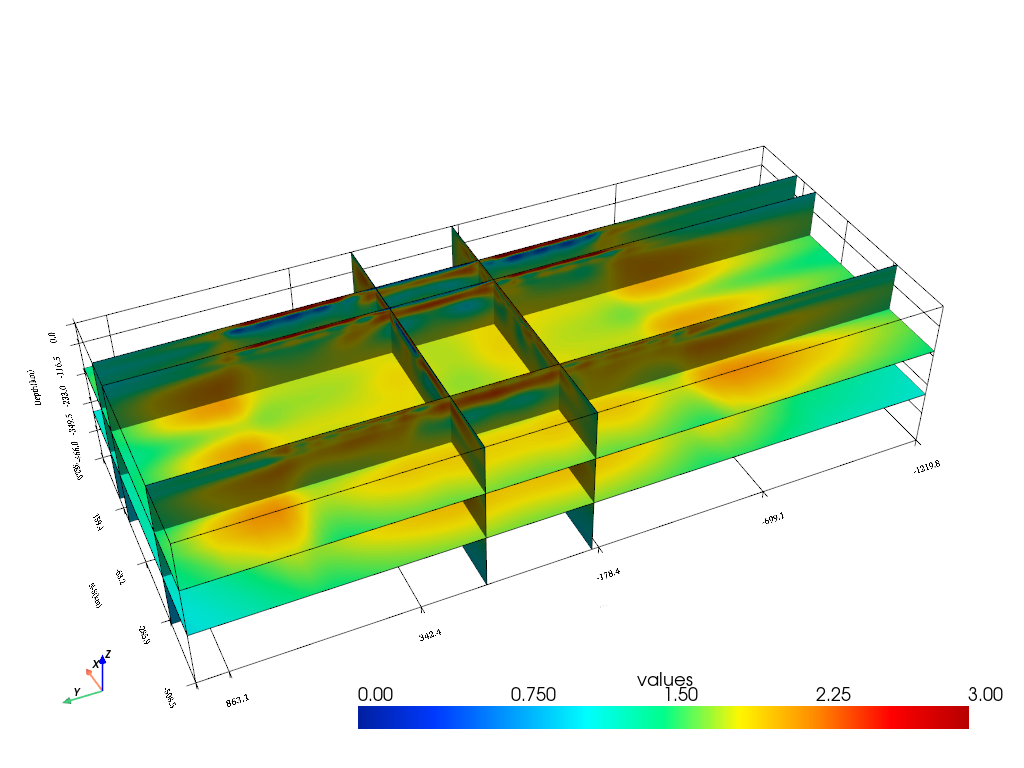

In [8]:
# 创建结构化网格
grid = pv.StructuredGrid()
grid.points = np.column_stack((x, y, z))
grid.dimensions = [len(np.unique(x)), len(np.unique(y)), len(np.unique(z))]

# 将数据添加到网格的点数据中
grid.point_data["values"] = values

# 创建 plotter 对象
plotter = pv.Plotter()

# 设置背景颜色为白色
plotter.set_background('white')

# 添加网格轮廓
plotter.add_mesh(grid.outline(), color='k')

# 添加水平切片
horizontal_slice = grid.slice(normal='z', origin=(0, 0, -150)) 
plotter.add_mesh(horizontal_slice, scalars="values", cmap=cmap, clim=[0, 3], opacity=1)
plotter.add_mesh(horizontal_slice.outline(), color='k')

horizontal_slice = grid.slice(normal='z', origin=(0, 0, -300))  
plotter.add_mesh(horizontal_slice, scalars="values", cmap=cmap, clim=[0, 3], opacity=1)
plotter.add_mesh(horizontal_slice.outline(), color='k')

# 添加垂直切片
vertical_slice = grid.slice(normal='y', origin=(0, 100, 0))  # 在y=2处切片
plotter.add_mesh(vertical_slice, scalars="values", cmap=cmap, clim=[0, 3], opacity=1)
plotter.add_mesh(vertical_slice.outline(), color='k')

vertical_slice = grid.slice(normal='y', origin=(0, -200, 0))  # 在y=6处切片
plotter.add_mesh(vertical_slice, scalars="values", cmap=cmap, clim=[0, 3], opacity=1)
plotter.add_mesh(vertical_slice.outline(), color='k')

# 添加x向的切片
vertical_slice = grid.slice(normal='x', origin=(100, 0, 0))  
plotter.add_mesh(vertical_slice, scalars="values", cmap=cmap, clim=[0, 3], opacity=1)
plotter.add_mesh(vertical_slice.outline(), color='k')

vertical_slice = grid.slice(normal='x', origin=(200, 0, 0))  
plotter.add_mesh(vertical_slice, scalars="values", cmap=cmap, clim=[0, 3], opacity=1)
plotter.add_mesh(vertical_slice.outline(), color='k')

vertical_slice = grid.slice(normal='x', origin=(-300, 0, 0))  
plotter.add_mesh(vertical_slice, scalars="values", cmap=cmap, clim=[0, 3], opacity=1)
plotter.add_mesh(vertical_slice.outline(), color='k')

# 添加坐标轴
plotter.show_axes()

# 自定义网格线和标注
plotter.show_grid(
    xtitle='N-S(km)', ytitle='E-W(km)', ztitle='Depth(km)',
    font_size=7,
    font_family='times',
    color='black',
    ticks='outside',
    show_xlabels=True, show_ylabels=True, show_zlabels=True
)

# 确保Z轴的刻度和标签可见
# plotter.add_scalar_bar(title="Values", n_labels=5, vertical=True, color='black', font_family='times')

# 设置三维视角
plotter.camera_position = 'iso'  # 等距视角
plotter.camera.azimuth = 110  # 方位角
plotter.camera.elevation = 4  # 仰角
plotter.camera.zoom(1.15)  # 稍微放大

# 显示图像
plotter.show()

## 绘制水平切片和垂直切片（原始网格数据）
个人是更喜欢原始数据绘制出的网格图形，还原真实面貌。

c:\Users\acer\mambaforge\envs\pyvista\lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


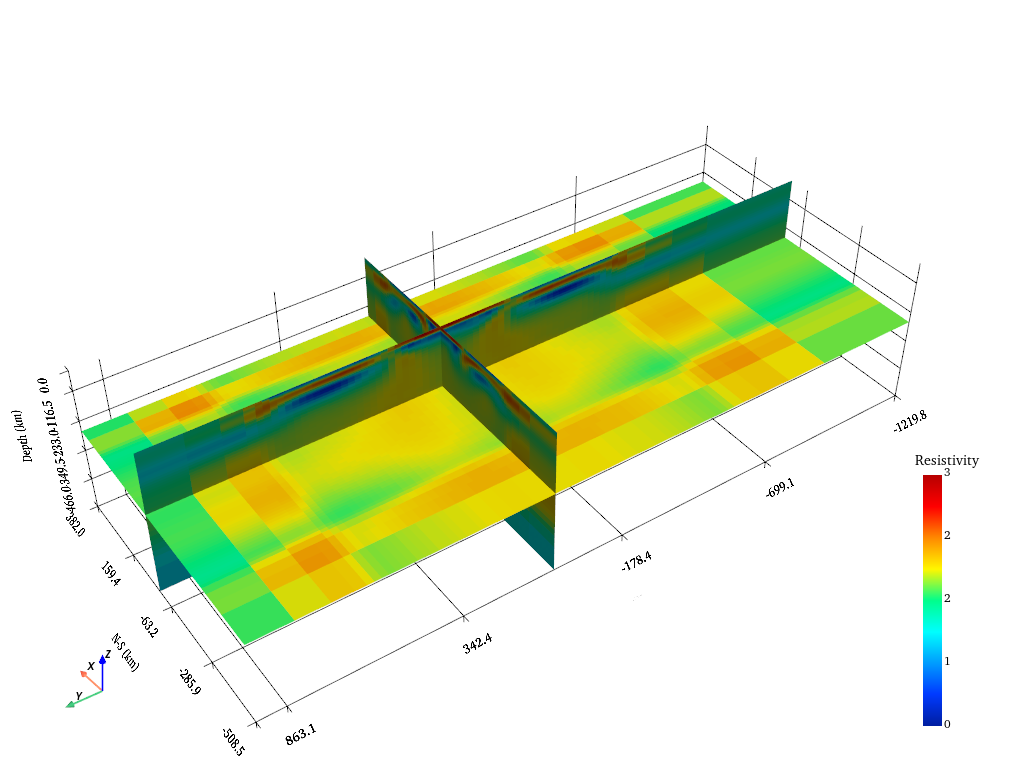

In [9]:
# 创建结构化网格
grid = pv.StructuredGrid()
grid.points = np.column_stack((x, y, z))
grid.dimensions = [len(np.unique(x)), len(np.unique(y)), len(np.unique(z))]

# 先将数据添加到网格的点数据中
grid.point_data["values"] = values

# 将点数据转换为单元数据
grid = grid.point_data_to_cell_data()

# 创建正交切片
slices = grid.slice_orthogonal(x=2, y=2, z=-200)

# 创建plotter对象
plotter = pv.Plotter()

# 添加切片到plotter，并设置不显示默认颜色条
plotter.add_mesh(slices, cmap=cmap, clim=[0, 3], show_edges=False, show_scalar_bar=False)

# 添加坐标轴
plotter.show_axes()

# 添加网格线和标注
plotter.show_grid(
    xtitle='N-S (km)', 
    ytitle='E-W (km)', 
    ztitle='Depth (km)',
    font_size=10,
    font_family='times',
    color='black',
    ticks='outside',
    show_xlabels=True, 
    show_ylabels=True, 
    show_zlabels=True
)

# 设置背景颜色为白色
plotter.set_background('white')
plotter.add_scalar_bar(
    title="Resistivity",
    n_labels=5,  # 增加标签数量以显示更多整数
    label_font_size=12,
    width=0.05,  # 颜色条的宽度（相对于窗口宽度）
    height=0.35,  # 颜色条的高度（相对于窗口高度）
    vertical=True,  # 垂直显示颜色条
    position_x=0.9,  # 颜色条的x位置（相对于窗口宽度）
    position_y=0.05,  # 颜色条的y位置（相对于窗口高度）
    title_font_size=14,
    shadow=True,
    n_colors=256,  # 颜色条中的颜色数量
    fmt="%.0f",  # 将标签格式改为整数
    font_family="times",
    outline=False,
    # nan_annotation=True,  # 显示NaN值的标注
    # below_label='Low',  # 添加最低值的标签
    # above_label='High',  # 添加最高值的标签
    use_opacity=False,  # 不使用透明度
)

# 设置视角
plotter.view_isometric()
plotter.camera_position = 'iso'  # 等距视角
plotter.camera.azimuth = 100  # 方位角
plotter.camera.elevation = 4  # 仰角
plotter.camera.zoom(1.15)  # 稍微放大

# 显示图像
plotter.show()


## 沿着某一个轴（x y z）绘制很多切片




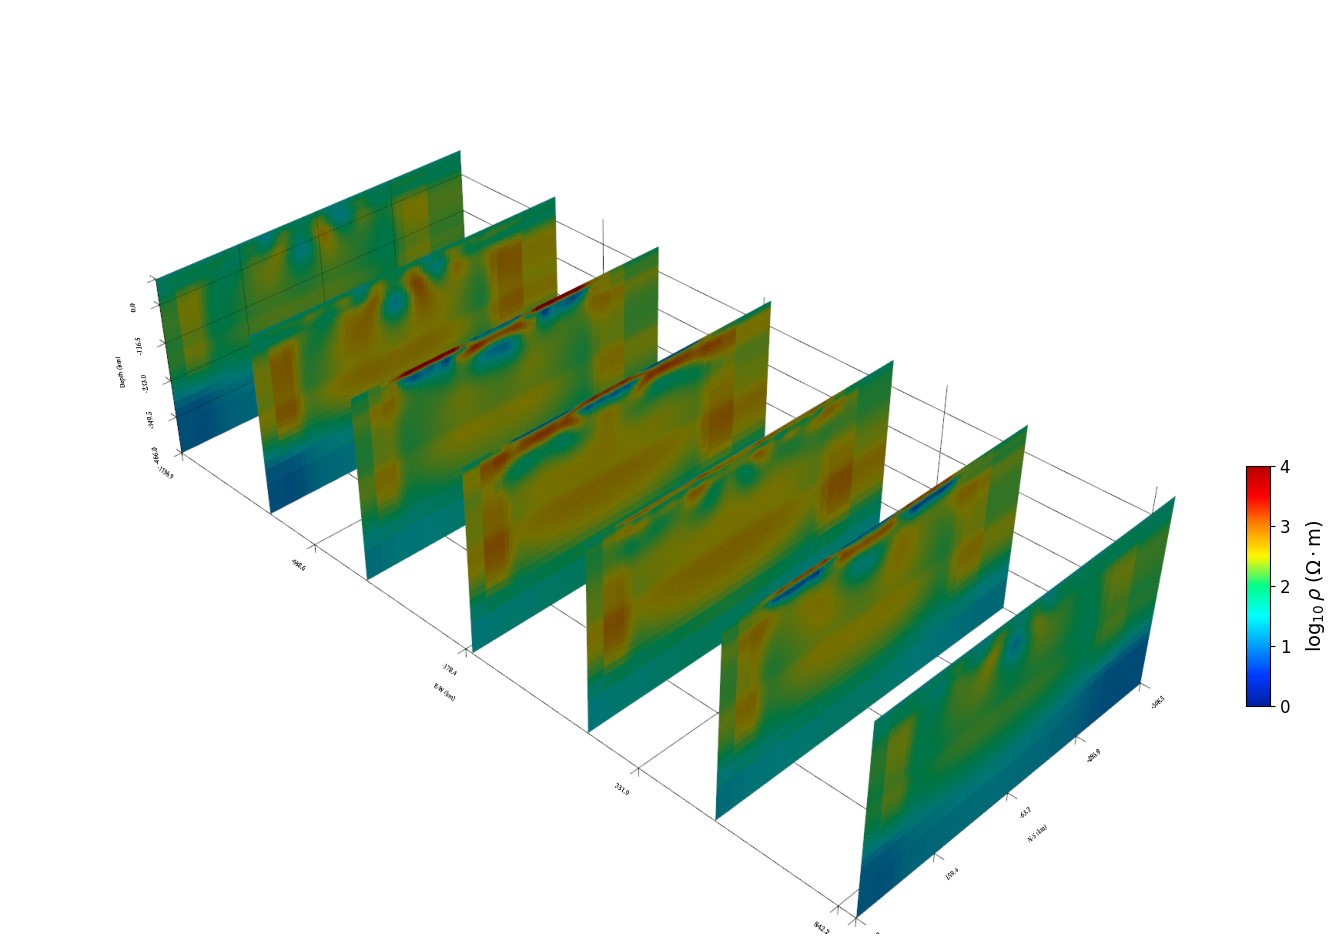

Complete image with colorbar saved to: output4\complete_plot.png


<Figure size 640x480 with 0 Axes>

In [10]:
import pyvista as pv  
import numpy as np  
import matplotlib.pyplot as plt  
import os  

# 确保 PyVista 在 Jupyter Notebook 中正确显示  
pv.set_jupyter_backend('static')  

# 创建结构化网格  
grid = pv.StructuredGrid()  
grid.points = data[:, :3]  
grid.dimensions = [len(np.unique(data[:, i])) for i in range(3)]  
grid.point_data["values"] = data[:, 3]  
grid = grid.point_data_to_cell_data()  

# 创建 PyVista plotter（设置为离屏模式）  
plotter = pv.Plotter(off_screen=True, notebook=True)  
plotter.window_size = [1600, 1200]  

# 使用 slice_along_axis 方法创建切片  
slices = grid.slice_along_axis(n=7, axis="y")  

# 添加切片到 plotter  
plotter.add_mesh(slices, cmap=cmap, clim=[0, 3], show_edges=False, show_scalar_bar=False)  

plotter.show_grid(xtitle='N-S (km)', ytitle='E-W (km)', ztitle='Depth (km)',  
                  font_size=7, font_family='times', color='black', ticks='outside')  
plotter.set_background('white')  

# 设置相机位置（可选，根据需要调整）  
plotter.camera_position = 'iso'  
plotter.camera.zoom(1.2)  

# 渲染图像并获取截图  
pyvista_image = plotter.screenshot(transparent_background=False, return_img=True)  

# 关闭 plotter  
plotter.close()  

# 创建 Matplotlib 图形并添加色标  
fig, ax = plt.subplots(figsize=(16, 12))  
ax.imshow(pyvista_image)  
ax.axis('off')  

# 添加色标  
cax = fig.add_axes([0.90, 0.3, 0.015, 0.2])  
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=4))  
cbar = fig.colorbar(sm, cax=cax)  
cbar.set_label(r'$\log_{10} \rho$ ($\Omega \cdot$m)', fontsize=14, labelpad=10)  
cbar.ax.tick_params(labelsize=12)  
cbar.set_ticks([0, 1, 2, 3, 4])  
cbar.set_ticklabels(['0', '1', '2', '3', '4'])  

# 显示图像  
plt.show()  

# 如果需要保存图像  
output_folder = 'output4'  
os.makedirs(output_folder, exist_ok=True)  
complete_image_path = os.path.join(output_folder, 'complete_plot.png')  
plt.savefig(complete_image_path, dpi=300, bbox_inches='tight')  
print(f"Complete image with colorbar saved to: {complete_image_path}")

## 画任意切片(原始网格)
该方法的关键点在于指定所画切片的法向量。

计算法向量的方法很多，我们是使用三个点确定一个面来计算法向量的。

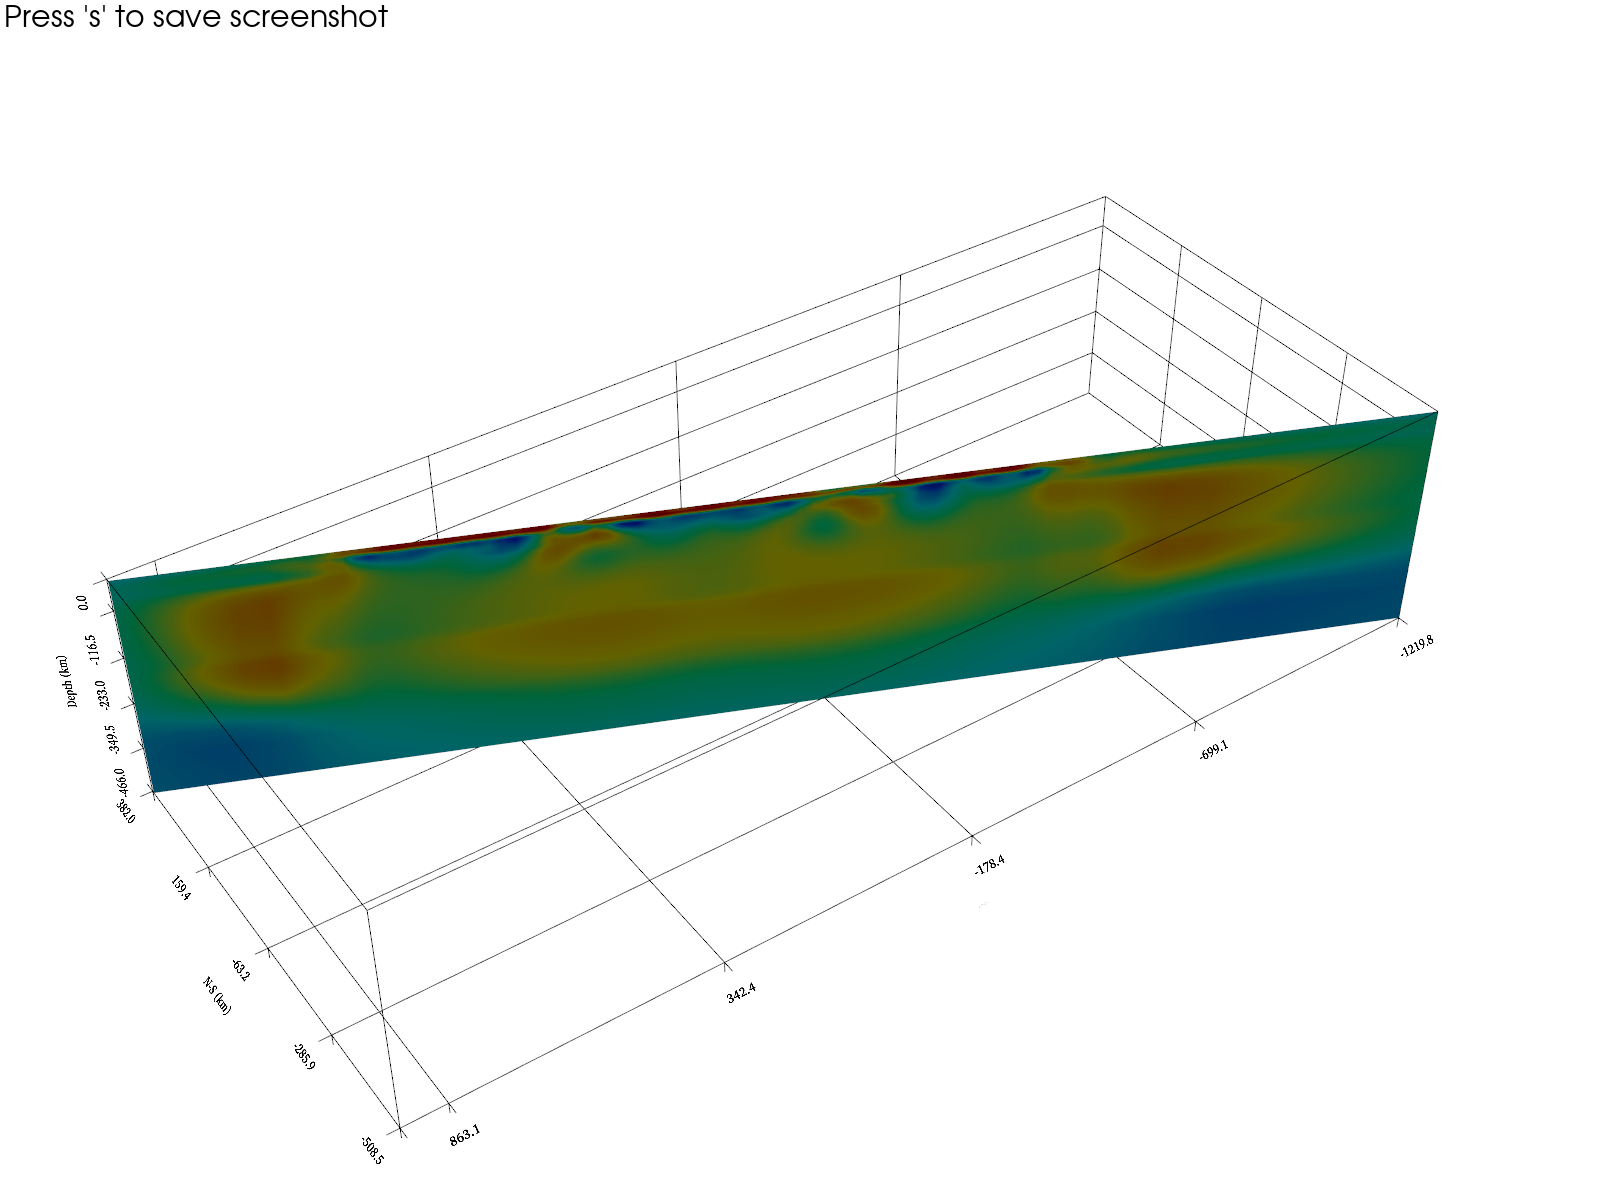

In [11]:
def get_plane_normal(point1, point2, point3):
    """
    计算通过三个点的平面的法向量
    """
    vector1 = np.array(point2) - np.array(point1)
    vector2 = np.array(point3) - np.array(point1)
    normal = np.cross(vector1, vector2)
    return normal / np.linalg.norm(normal)
# 创建结构化网格
grid = pv.StructuredGrid()
grid.points = data[:, :3]
grid.dimensions = [len(np.unique(data[:, i])) for i in range(3)]
grid.point_data["values"] = data[:, 3]

# 定义平面的三个点（这里您可以修改来改变切片方向）
point1 = [-500,-1200,0]
point2 = [350,800,0]
point3 = [350,800,500]

# 计算法向量
normal = get_plane_normal(point1, point2, point3)

# 创建切片
single_slice = grid.slice(normal=normal, origin=point1)

# 创建 PyVista plotter（设置为交互模式）
plotter = pv.Plotter(off_screen=False)
plotter.window_size = [1600, 1200]

# 添加网格轮廓
plotter.add_mesh(grid.outline(), color="k")

# 添加切片到 plotter
plotter.add_mesh(single_slice, cmap=cmap, clim=[0, 3], show_edges=False, show_scalar_bar=False)

plotter.show_grid(xtitle='N-S (km)', ytitle='E-W (km)', ztitle='Depth (km)',
                  font_size=10, font_family='times', color='black', ticks='outside')
plotter.set_background('white')

# 设置相机位置以更好地查看切片
plotter.camera_position = 'iso'

# 定义保存图像的函数
def save_screenshot(plotter):
    # 获取当前视图的截图
    image = plotter.screenshot(transparent_background=False, return_img=True)
    
    # 创建 Matplotlib 图形并添加色标
    fig, ax = plt.subplots(figsize=(16, 12))
    ax.imshow(image)
    ax.axis('off')

    # 添加色标
    cax = fig.add_axes([0.90, 0.3, 0.015, 0.2])
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=3))
    cbar = fig.colorbar(sm, cax=cax)
    cbar.set_label(r'$\log_{10} \rho$ ($\Omega \cdot$m)', fontsize=14, labelpad=10)
    cbar.ax.tick_params(labelsize=12)
    cbar.set_ticks([0, 1, 2, 3, 4])
    cbar.set_ticklabels(['0', '1', '2', '3', '4'])

    # 保存带有色标的图像
    output_folder = 'output4'
    os.makedirs(output_folder, exist_ok=True)
    complete_image_path = os.path.join(output_folder, 'complete_vertical_slice.png')
    plt.savefig(complete_image_path, dpi=300, bbox_inches='tight')
    print(f"Complete vertical slice with colorbar saved to: {complete_image_path}")
    plt.close(fig)

# 添加键盘事件
plotter.add_key_event('s', lambda: save_screenshot(plotter))


plotter.camera_position = 'iso'  # 等距视角
plotter.camera.azimuth = 100  # 方位角
plotter.camera.elevation = 4  # 仰角
plotter.camera.zoom(1.15)  # 稍微放大

# 显示说明
plotter.add_text("Press 's' to save screenshot", font_size=12)

# 显示交互式窗口
plotter.show()

# 关闭 plotter
plotter.close()

## 绘制具有一定弧度的切片
针对弧形的测线，或者都可。

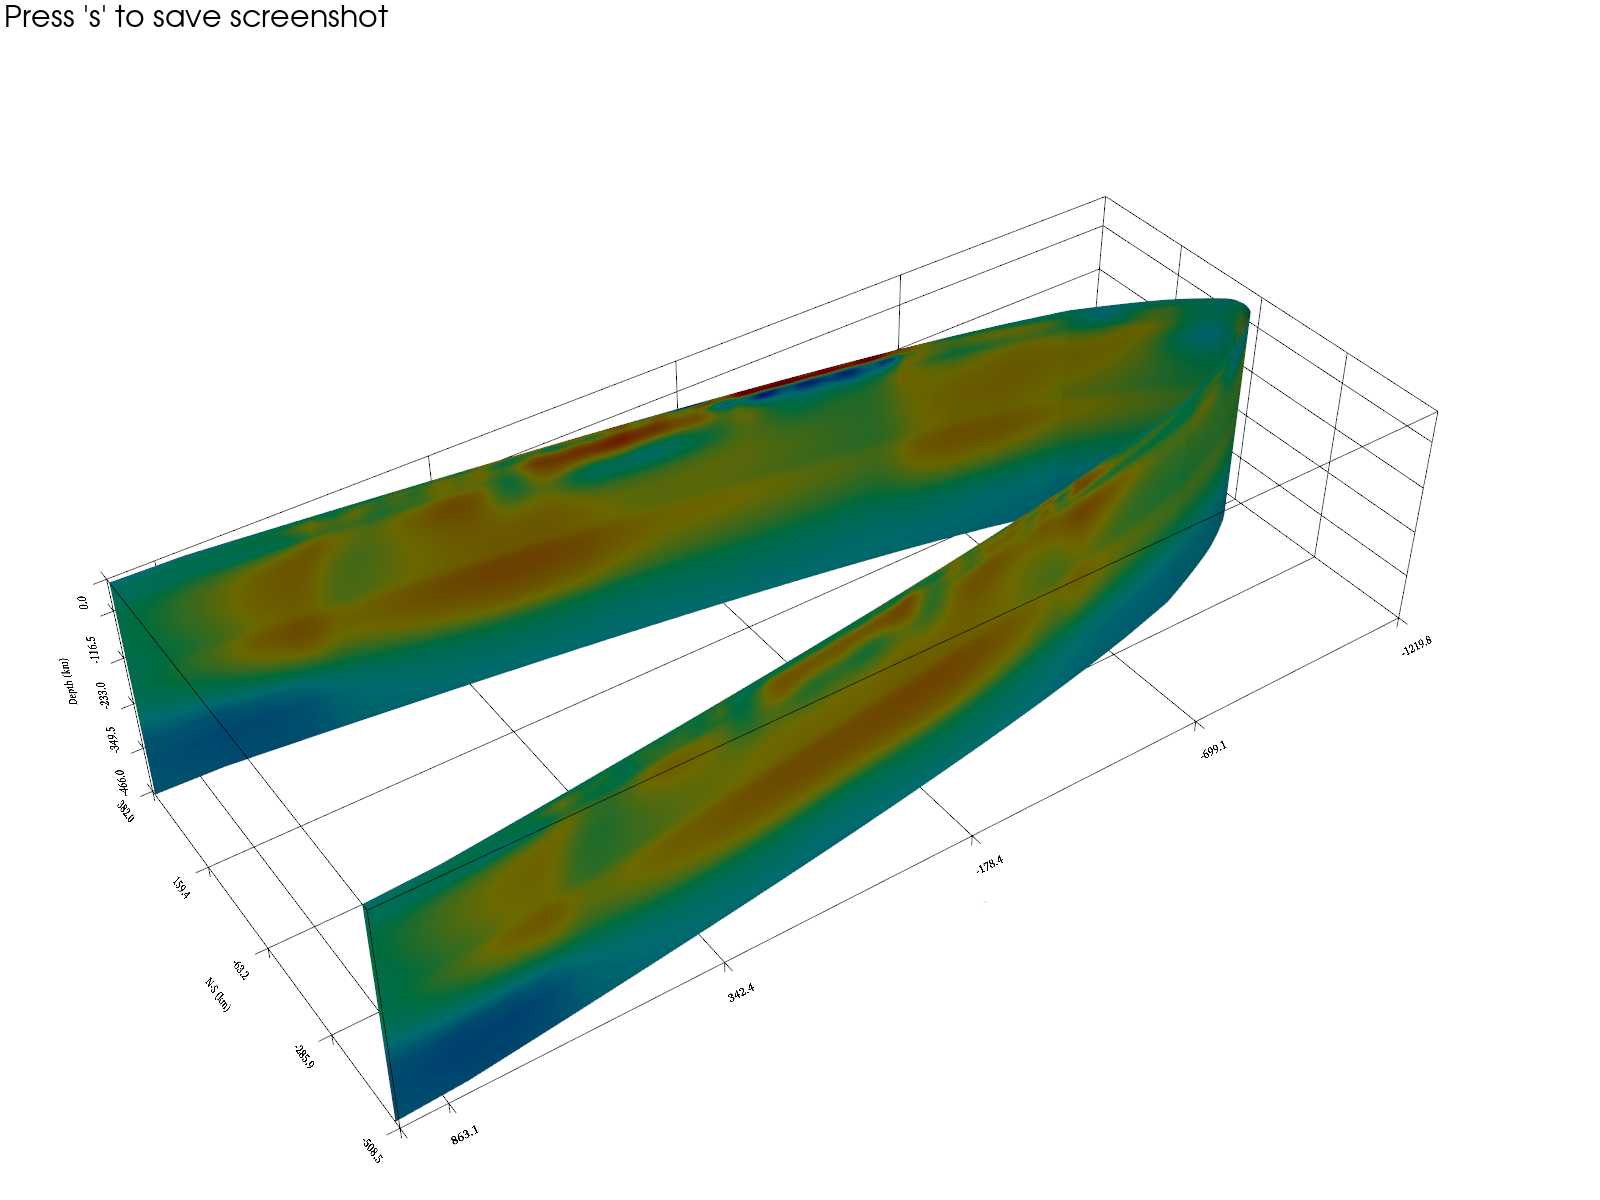

In [12]:
import time

# 创建结构化网格
grid = pv.StructuredGrid()
grid.points = data[:, :3]
grid.dimensions = [len(np.unique(data[:, i])) for i in range(3)]
grid.point_data["values"] = data[:, 3]

# 定义弧形路径
def path(x, x_start, x_end, y_start, y_end):
    """Equation: y = a(x-h)^2 + k"""
    a = (y_end - y_start) / ((x_end - x_start) / 2)**2
    h = (x_start + x_end) / 2
    k = y_start
    y = a * (x - h)**2 + k
    return x, y

# 指定弧形切片的边界
x_start, x_end =-500,380  # X轴范围
y_start, y_end = -1200,850 # Y轴范围
z_start, z_end = 0,500  # Z轴范围

# 创建弧形切片的点
x = np.linspace(x_start, x_end, 100)
x, y = path(x, x_start, x_end, y_start, y_end)
z = np.linspace(z_start, z_end, len(x))
points = np.c_[x, y, z]

# 创建样条曲线
spline = pv.Spline(points, 100)

# 沿样条曲线创建切片
slc = grid.slice_along_line(spline)

# 创建 PyVista plotter（设置为交互模式）
plotter = pv.Plotter(off_screen=False)
plotter.window_size = [1600, 1200]

# 添加切片到 plotter，不显示 PyVista 的色标
plotter.add_mesh(slc, cmap=cmap, clim=[0, 3], show_edges=False, show_scalar_bar=False)

# 添加网格轮廓
plotter.add_mesh(grid.outline(), color="k")

plotter.show_grid(xtitle='N-S (km)', ytitle='E-W (km)', ztitle='Depth (km)',
                  font_size=9, font_family='times', color='black', ticks='outside')
plotter.set_background('white')

# 设置相机位置
plotter.camera_position = [1, -1, 1]

# 定义保存图像的函数
def save_screenshot():
    output_folder = 'output4'
    os.makedirs(output_folder, exist_ok=True)
    image_path = os.path.join(output_folder, 'curved_slice_screenshot.png')
    
    # 获取 PyVista 渲染的图像
    image = plotter.screenshot(transparent_background=False, return_img=True)
    
    # 创建 Matplotlib 图形并添加色标
    fig, ax = plt.subplots(figsize=(16, 12))
    ax.imshow(image)
    ax.axis('off')

    # 添加色标
    cax = fig.add_axes([0.90, 0.3, 0.015, 0.2])
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=3))
    cbar = fig.colorbar(sm, cax=cax)
    cbar.set_label(r'$\log_{10} \rho$ ($\Omega \cdot$m)', fontsize=14, labelpad=10)
    cbar.ax.tick_params(labelsize=12)
    cbar.set_ticks([0, 1, 2, 3, 4])
    cbar.set_ticklabels(['0', '1', '2', '3', '4'])

    # 保存带有 Matplotlib 色标的图像
    plt.savefig(image_path, dpi=300, bbox_inches='tight')
    plt.close(fig)
    
    print(f"Screenshot saved to: {image_path}")
    
    # 添加临时文本显示保存成功
    message = f"Screenshot saved to: {image_path}"
    text_actor = plotter.add_text(message, font_size=12, name='save_message')
    plotter.render()  # 更新渲染
    
    # 等待3秒
    time.sleep(3)
    
    # 移除文本
    plotter.remove_actor(text_actor)
    plotter.render()  # 再次更新渲染

# 添加键盘事件
plotter.add_key_event('s', save_screenshot)

plotter.camera_position = 'iso'  # 等距视角
plotter.camera.azimuth = 100  # 方位角
plotter.camera.elevation = 4  # 仰角
plotter.camera.zoom(1.15)  # 稍微放大
# 显示说明
plotter.add_text("Press 's' to save screenshot", font_size=12)

# 显示交互式窗口
plotter.show()